<div style="display: flex; background-color: RGB(255,114,0); padding: 30px;" >

# CNN
</div>

* Créer des paires de document (article, highlights)
* Suppression de la ponctuation
* Séparation en token en minuscules
* Suppression des stopwords pour les articles
* Calcul des fréquences et tf-idf sur les deux types de documents
* Enregistrement du nouveau jeu de données d’entraînement pour usage ultérieur

Vous êtes allé jusqu'au bout ? Vérifiez-bien que vous avez les éléments suivants :

* le texte final est tokenisé sans ponctuation et en minuscules à l’aide d’une regex ;
* tous les documents ont été transformés en matrices de valeurs tf-idf calculées sur les paires (articles, highlight).

In [1]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from os import getcwd, listdir
from os.path import isfile, join
import bs4
import nltk
from nlp_function import *

In [ ]:
# import nltk
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('wordnet')
# nltk.download('averaged_perceptron_tagger')
# nltk.download('maxent_ne_chunker')
# nltk.download('words')

<div style="display: flex; background-color: Blue; padding: 15px;" >

# Chargement

In [3]:
# ---------------------------------------------------------------------------------------------
#                               MAIN
# ---------------------------------------------------------------------------------------------
verbose = False
verboseMain = False

# Récupère le répertoire du programme
file_path = getcwd() + "\\"
data_path = file_path+"cnn2\\"
data_path

'c:\\Users\\User\\WORK\\workspace-ia\\simplon\\2022-02-4470541-analysez-vos-donnees-textuelles\\cnn2\\'

In [4]:
fichiers = [f for f in listdir(data_path) if isfile(join(data_path, f)) and f.endswith(".story")]
fichiers

['cnn-story (1).story',
 'cnn-story (10).story',
 'cnn-story (11).story',
 'cnn-story (2).story',
 'cnn-story (3).story',
 'cnn-story (4).story',
 'cnn-story (5).story',
 'cnn-story (6).story',
 'cnn-story (7).story',
 'cnn-story (8).story',
 'cnn-story (9).story']

In [5]:
def get_data_from_page(file_path):
  
    highlights = []
    sentences = ""
    try:
        # Ouvrir le fichier en lecture seule
        file = open(file_path, "r")
        # utiliser readlines pour lire toutes les lignes du fichier
        # La variable "lignes" est une liste contenant toutes les lignes du fichier
        datas = file.read()

        dat = datas.split("@highlight")
        sentences = dat[0].strip()
        # Itérer sur les lignes
        for i in range (1, len(dat)):
            
            hig = dat[i].strip()
            if len(hig)>0:
                highlights.append(hig)
    except Exception as error:
        print(file_path, error)
    finally:
        try:
            # fermez le fichier après avoir lu les lignes
            file.close()
        except:
            pass
        
    return (highlights, sentences)

In [6]:
def get_data_from_page_old(file_path):
  
    # Ouvrir le fichier en lecture seule
    file = open(file_path, "r")
    # utiliser readlines pour lire toutes les lignes du fichier
    # La variable "lignes" est une liste contenant toutes les lignes du fichier
    lines = file.readlines()
    # fermez le fichier après avoir lu les lignes
    file.close()

    highlights = []
    next_high = False
    sentences = ""

    # Itérer sur les lignes
    for line in lines:
        if "@highlight" in line:
            next_high = True
            continue
        str = line.strip()
        if len(str)>0:
            if next_high:
                highlights.append(line.strip())
            else:
                sentences += line.strip() + " "
        
    return (highlights, sentences)

In [7]:
df_origin = pd.DataFrame(columns=['file','highlights','sentences'])

In [8]:
for file in fichiers:
    try:
        highlights, sentences = get_data_from_page(data_path+file)
        new_row = {'file':file,'highlights':highlights, 'sentences':sentences}
        df_origin = df_origin.append(new_row,ignore_index=True, verify_integrity=False)
    except Exception as error:
        print(error)
print(df_origin.shape)
df_origin.head()

(11, 3)


,file,highlights,sentences
0,cnn-story (1).story,[Rory McIlroy shoots a course record at the Sc...,(CNN) -- Rory McIlroy is off to a good start a...
1,cnn-story (10).story,[Africa Fashion Week London was held from Augu...,(CNN) -- Loud music pumps through huge speaker...
2,cnn-story (11).story,[Mao proved to be good at fighting but poor at...,"BEIJING, China (CNN) -- Soon after I first cam..."
3,cnn-story (2).story,[Dean Obeidallah: A movie or TV show can educa...,(CNN) -- Can a movie actually convince you to ...
4,cnn-story (3).story,[Math geeks and others celebrate Pi Day every ...,March 14 is my favorite day to be a nerd.\n\nA...


<div style="display: flex; background-color: Blue; padding: 15px;" >

# NLP pre-processing MANUEL

</div>

<div style="display: flex; background-color: Green; padding: 7px;" >

## Version 1
</div>

In [9]:
df_token = token_data(df_origin, 'sentences', "v1_")

In [10]:
df_token["v1_tokens"]

4     [march, 14, is, my, favorite, day, to, be, a, ...
2     [beijing, china, cnn, soon, after, i, first, c...
9     [twitter, is, on, the, verge, of, its, initial...
8     [washington, cnn, the, white, house, wednesday...
3     [cnn, can, a, movie, actually, convince, you, ...
5     [beijing, cnn, families, of, chinese, passenge...
1     [cnn, loud, music, pumps, through, huge, speak...
10    [cnn, the, man, suspected, of, trying, to, att...
0     [cnn, rory, mcilroy, is, off, to, a, good, sta...
6     [united, nations, cnn, the, u, n, security, co...
7     [a, bipartisan, group, of, women, senators, wa...
Name: v1_tokens, dtype: object

In [11]:
# Premièrement, on récupère la fréquence totale de chaque mot sur tout le corpus d'artistes
df_token["v1_freq"]

4     {'march': 4, '14': 11, 'is': 19, 'my': 1, 'fav...
2     {'beijing': 5, 'china': 24, 'cnn': 1, 'soon': ...
9     {'twitter': 8, 'is': 16, 'on': 6, 'the': 41, '...
8     {'washington': 2, 'cnn': 7, 'the': 50, 'white'...
3     {'cnn': 1, 'can': 8, 'a': 15, 'movie': 6, 'act...
5     {'beijing': 3, 'cnn': 4, 'families': 7, 'of': ...
1     {'cnn': 1, 'loud': 1, 'music': 1, 'pumps': 1, ...
10    {'cnn': 1, 'the': 64, 'man': 3, 'suspected': 1...
0     {'cnn': 1, 'rory': 1, 'mcilroy': 7, 'is': 3, '...
6     {'united': 2, 'nations': 2, 'cnn': 1, 'the': 2...
7     {'a': 11, 'bipartisan': 1, 'group': 1, 'of': 5...
Name: v1_freq, dtype: object

In [12]:
df_token.columns

Index(['file', 'highlights', 'sentences', 'v1_tokens', 'v1_word_count',
       'v1_freq', 'v1_unique_word_count'],
      dtype='object')

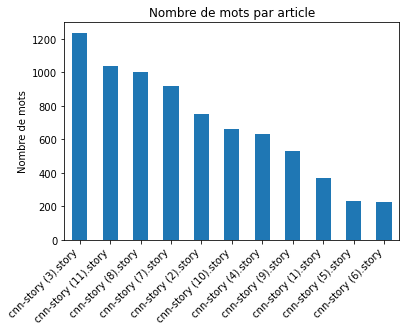

In [13]:
df_token = df_token.sort_values(by=["v1_word_count"], ascending=False)
df_token.plot(kind='bar', x='file', y="v1_word_count", title='Nombre de mots par article',legend=None)
plt.ylabel("Nombre de mots")
plt.xlabel("")
plt.xticks(rotation=45, ha="right")
plt.show()

In [14]:
df_token[["v1_word_count", "v1_unique_word_count"]]

,v1_word_count,v1_unique_word_count
4,1236,533
2,1036,524
9,1001,488
8,917,394
3,753,361
1,662,327
5,634,328
10,531,262
0,367,202
6,234,143


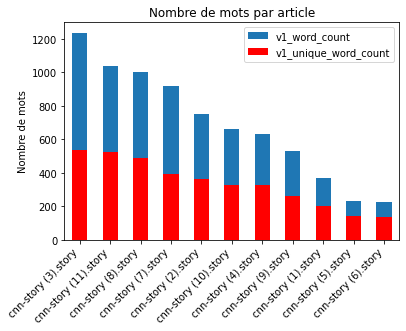

In [15]:
ax = df_token.plot(kind='bar', x='file', y="v1_word_count", title='Nombre de mots par article')
df_token.plot(y="v1_unique_word_count", x='file', kind="bar", ax=ax, color="red")
plt.ylabel("Nombre de mots")
plt.xlabel("")
plt.xticks(rotation=45, ha="right")
plt.show()

In [16]:
df_token.head()

,file,highlights,sentences,v1_tokens,v1_word_count,v1_freq,v1_unique_word_count
4,cnn-story (3).story,[Math geeks and others celebrate Pi Day every ...,March 14 is my favorite day to be a nerd.\n\nA...,"[march, 14, is, my, favorite, day, to, be, a, ...",1236,"{'march': 4, '14': 11, 'is': 19, 'my': 1, 'fav...",533
2,cnn-story (11).story,[Mao proved to be good at fighting but poor at...,"BEIJING, China (CNN) -- Soon after I first cam...","[beijing, china, cnn, soon, after, i, first, c...",1036,"{'beijing': 5, 'china': 24, 'cnn': 1, 'soon': ...",524
9,cnn-story (8).story,"[Soraya Chemaly: Twitter, on verge of IPO, is ...",Twitter is on the verge of its initial public ...,"[twitter, is, on, the, verge, of, its, initial...",1001,"{'twitter': 8, 'is': 16, 'on': 6, 'the': 41, '...",488
8,cnn-story (7).story,"[NEW: ""This is not the Scott we knew,"" White H...",WASHINGTON (CNN) -- The White House Wednesday ...,"[washington, cnn, the, white, house, wednesday...",917,"{'washington': 2, 'cnn': 7, 'the': 50, 'white'...",394
3,cnn-story (2).story,[Dean Obeidallah: A movie or TV show can educa...,(CNN) -- Can a movie actually convince you to ...,"[cnn, can, a, movie, actually, convince, you, ...",753,"{'cnn': 1, 'can': 8, 'a': 15, 'movie': 6, 'act...",361


<div style="display: flex; background-color: Blue; padding: 15px;" >

# NLP pre-processing

<div style="display: flex; background-color: Green; padding: 7px;" >

## NLP - Text Pre-Processing I (Text Cleaning)
</div>

1. Conversion to Lower Case
2. Removing HTML-Tags
3. Removing URLs
4. Removing Accented Characters
5. Removing Punctuation
6. Removing irrelevant Characters (Numbers and Punctuation)
7. Removing extra Whitespaces
8. Extra: Count Words
9. Extra: Expanding Contractions

In [17]:
import pandas as pd
import numpy as np
import pickle as pk
import warnings
warnings.filterwarnings("ignore")
import unicodedata
import re
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords, wordnet
from nltk import pos_tag, ne_chunk

from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from nltk.probability import FreqDist
import matplotlib.pyplot as plt
# from wordcloud import WordCloud
from nlp_function import *

In [18]:
# import nltk
# nltk.download('punkt') => Déjà fait
# nltk.download('stopwords')
# nltk.download('wordnet')
# nltk.download('averaged_perceptron_tagger')
# nltk.download('maxent_ne_chunker')
# nltk.download('words')

In [19]:
df_nlp = df_token.copy()

In [20]:
df_nlp.columns

Index(['file', 'highlights', 'sentences', 'v1_tokens', 'v1_word_count',
       'v1_freq', 'v1_unique_word_count'],
      dtype='object')

In [21]:
df_nlp['v2_clean_sentences'] = df_nlp['sentences'].str.lower()
df_nlp['v2_clean_sentences'] = df_nlp['v2_clean_sentences'].apply(remove_html_tags_func)
df_nlp['v2_clean_sentences'] = df_nlp['v2_clean_sentences'].apply(remove_url_func)
df_nlp['v2_clean_sentences'] = df_nlp['v2_clean_sentences'].apply(remove_accented_chars_func)
df_nlp['v2_clean_sentences'] = df_nlp['v2_clean_sentences'].apply(remove_punctuation_func)
# df_nlp['v2_clean_sentences'] = df_nlp['v2_clean_sentences'].apply(remove_irr_char_func)
df_nlp['v2_clean_sentences'] = df_nlp['v2_clean_sentences'].apply(remove_extra_whitespaces_func)

df_nlp.head()

,file,highlights,sentences,v1_tokens,v1_word_count,v1_freq,v1_unique_word_count,v2_clean_sentences
4,cnn-story (3).story,[Math geeks and others celebrate Pi Day every ...,March 14 is my favorite day to be a nerd.\n\nA...,"[march, 14, is, my, favorite, day, to, be, a, ...",1236,"{'march': 4, '14': 11, 'is': 19, 'my': 1, 'fav...",533,march 14 is my favorite day to be a nerd acros...
2,cnn-story (11).story,[Mao proved to be good at fighting but poor at...,"BEIJING, China (CNN) -- Soon after I first cam...","[beijing, china, cnn, soon, after, i, first, c...",1036,"{'beijing': 5, 'china': 24, 'cnn': 1, 'soon': ...",524,beijing china cnn soon after i first came to v...
9,cnn-story (8).story,"[Soraya Chemaly: Twitter, on verge of IPO, is ...",Twitter is on the verge of its initial public ...,"[twitter, is, on, the, verge, of, its, initial...",1001,"{'twitter': 8, 'is': 16, 'on': 6, 'the': 41, '...",488,twitter is on the verge of its initial public ...
8,cnn-story (7).story,"[NEW: ""This is not the Scott we knew,"" White H...",WASHINGTON (CNN) -- The White House Wednesday ...,"[washington, cnn, the, white, house, wednesday...",917,"{'washington': 2, 'cnn': 7, 'the': 50, 'white'...",394,washington cnn the white house wednesday said ...
3,cnn-story (2).story,[Dean Obeidallah: A movie or TV show can educa...,(CNN) -- Can a movie actually convince you to ...,"[cnn, can, a, movie, actually, convince, you, ...",753,"{'cnn': 1, 'can': 8, 'a': 15, 'movie': 6, 'act...",361,cnn can a movie actually convince you to suppo...


In [22]:
df_nlp = token_data(df_nlp, 'v2_clean_sentences', "v2_")

In [23]:
df_nlp.head()

,file,highlights,sentences,v1_tokens,v1_word_count,v1_freq,v1_unique_word_count,v2_clean_sentences,v2_tokens,v2_word_count,v2_freq,v2_unique_word_count
4,cnn-story (3).story,[Math geeks and others celebrate Pi Day every ...,March 14 is my favorite day to be a nerd.\n\nA...,"[march, 14, is, my, favorite, day, to, be, a, ...",1236,"{'march': 4, '14': 11, 'is': 19, 'my': 1, 'fav...",533,march 14 is my favorite day to be a nerd acros...,"[march, 14, is, my, favorite, day, to, be, a, ...",1236,"{'march': 4, '14': 11, 'is': 19, 'my': 1, 'fav...",533
2,cnn-story (11).story,[Mao proved to be good at fighting but poor at...,"BEIJING, China (CNN) -- Soon after I first cam...","[beijing, china, cnn, soon, after, i, first, c...",1036,"{'beijing': 5, 'china': 24, 'cnn': 1, 'soon': ...",524,beijing china cnn soon after i first came to v...,"[beijing, china, cnn, soon, after, i, first, c...",1036,"{'beijing': 5, 'china': 24, 'cnn': 1, 'soon': ...",523
9,cnn-story (8).story,"[Soraya Chemaly: Twitter, on verge of IPO, is ...",Twitter is on the verge of its initial public ...,"[twitter, is, on, the, verge, of, its, initial...",1001,"{'twitter': 8, 'is': 16, 'on': 6, 'the': 41, '...",488,twitter is on the verge of its initial public ...,"[twitter, is, on, the, verge, of, its, initial...",1001,"{'twitter': 8, 'is': 16, 'on': 6, 'the': 41, '...",488
8,cnn-story (7).story,"[NEW: ""This is not the Scott we knew,"" White H...",WASHINGTON (CNN) -- The White House Wednesday ...,"[washington, cnn, the, white, house, wednesday...",917,"{'washington': 2, 'cnn': 7, 'the': 50, 'white'...",394,washington cnn the white house wednesday said ...,"[washington, cnn, the, white, house, wednesday...",917,"{'washington': 2, 'cnn': 7, 'the': 50, 'white'...",393
3,cnn-story (2).story,[Dean Obeidallah: A movie or TV show can educa...,(CNN) -- Can a movie actually convince you to ...,"[cnn, can, a, movie, actually, convince, you, ...",753,"{'cnn': 1, 'can': 8, 'a': 15, 'movie': 6, 'act...",361,cnn can a movie actually convince you to suppo...,"[cnn, can, a, movie, actually, convince, you, ...",753,"{'cnn': 1, 'can': 8, 'a': 15, 'movie': 6, 'act...",361


In [24]:
print('Average of words counted: ')
print(' - V1 : ' + str(df_nlp['v1_word_count'].mean()))
print(' - V2 : ' + str(df_nlp['v2_word_count'].mean()))
print('Average of words unique counted: ')
print(' - V1 : ' + str(df_nlp['v1_unique_word_count'].mean()))
print(' - V2 : ' + str(df_nlp['v2_unique_word_count'].mean()))
df_nlp.head()


Average of words counted: 
 - V1 : 690.3636363636364
 - V2 : 690.3636363636364
Average of words unique counted: 
 - V1 : 336.3636363636364
 - V2 : 336.09090909090907


,file,highlights,sentences,v1_tokens,v1_word_count,v1_freq,v1_unique_word_count,v2_clean_sentences,v2_tokens,v2_word_count,v2_freq,v2_unique_word_count
4,cnn-story (3).story,[Math geeks and others celebrate Pi Day every ...,March 14 is my favorite day to be a nerd.\n\nA...,"[march, 14, is, my, favorite, day, to, be, a, ...",1236,"{'march': 4, '14': 11, 'is': 19, 'my': 1, 'fav...",533,march 14 is my favorite day to be a nerd acros...,"[march, 14, is, my, favorite, day, to, be, a, ...",1236,"{'march': 4, '14': 11, 'is': 19, 'my': 1, 'fav...",533
2,cnn-story (11).story,[Mao proved to be good at fighting but poor at...,"BEIJING, China (CNN) -- Soon after I first cam...","[beijing, china, cnn, soon, after, i, first, c...",1036,"{'beijing': 5, 'china': 24, 'cnn': 1, 'soon': ...",524,beijing china cnn soon after i first came to v...,"[beijing, china, cnn, soon, after, i, first, c...",1036,"{'beijing': 5, 'china': 24, 'cnn': 1, 'soon': ...",523
9,cnn-story (8).story,"[Soraya Chemaly: Twitter, on verge of IPO, is ...",Twitter is on the verge of its initial public ...,"[twitter, is, on, the, verge, of, its, initial...",1001,"{'twitter': 8, 'is': 16, 'on': 6, 'the': 41, '...",488,twitter is on the verge of its initial public ...,"[twitter, is, on, the, verge, of, its, initial...",1001,"{'twitter': 8, 'is': 16, 'on': 6, 'the': 41, '...",488
8,cnn-story (7).story,"[NEW: ""This is not the Scott we knew,"" White H...",WASHINGTON (CNN) -- The White House Wednesday ...,"[washington, cnn, the, white, house, wednesday...",917,"{'washington': 2, 'cnn': 7, 'the': 50, 'white'...",394,washington cnn the white house wednesday said ...,"[washington, cnn, the, white, house, wednesday...",917,"{'washington': 2, 'cnn': 7, 'the': 50, 'white'...",393
3,cnn-story (2).story,[Dean Obeidallah: A movie or TV show can educa...,(CNN) -- Can a movie actually convince you to ...,"[cnn, can, a, movie, actually, convince, you, ...",753,"{'cnn': 1, 'can': 8, 'a': 15, 'movie': 6, 'act...",361,cnn can a movie actually convince you to suppo...,"[cnn, can, a, movie, actually, convince, you, ...",753,"{'cnn': 1, 'can': 8, 'a': 15, 'movie': 6, 'act...",361


In [25]:
df_nlp.columns

Index(['file', 'highlights', 'sentences', 'v1_tokens', 'v1_word_count',
       'v1_freq', 'v1_unique_word_count', 'v2_clean_sentences', 'v2_tokens',
       'v2_word_count', 'v2_freq', 'v2_unique_word_count'],
      dtype='object')

In [26]:
df_diff = df_nlp.loc[df_nlp['v1_unique_word_count'] != df_nlp['v2_unique_word_count'], ['file', 'sentences', 'v2_clean_sentences']]
df_diff.shape

(3, 3)

<div style="display: flex; background-color: Green; padding: 7px;" >

## NLP - Text Pre-Processing II (Tokenization and Stop Words)
</div>

1. (Text Cleaning)
1. Tokenization
   1. Word Tokenizer
   1. Sentence Tokenizer
   1. Application to the Example String
   1. Application to the DataFrame
1. Stop Words
   1. Application to the Example String
   1. Application to the DataFrame


In [27]:
df_step3 = df_word_tokenize(df_nlp, 'v2_clean_sentences', "v3_")
df_step3.head()

,file,highlights,sentences,v1_tokens,v1_word_count,v1_freq,v1_unique_word_count,v2_clean_sentences,v2_tokens,v2_word_count,v2_freq,v2_unique_word_count,v3_word_tokenize
4,cnn-story (3).story,[Math geeks and others celebrate Pi Day every ...,March 14 is my favorite day to be a nerd.\n\nA...,"[march, 14, is, my, favorite, day, to, be, a, ...",1236,"{'march': 4, '14': 11, 'is': 19, 'my': 1, 'fav...",533,march 14 is my favorite day to be a nerd acros...,"[march, 14, is, my, favorite, day, to, be, a, ...",1236,"{'march': 4, '14': 11, 'is': 19, 'my': 1, 'fav...",533,"[march, 14, is, my, favorite, day, to, be, a, ..."
2,cnn-story (11).story,[Mao proved to be good at fighting but poor at...,"BEIJING, China (CNN) -- Soon after I first cam...","[beijing, china, cnn, soon, after, i, first, c...",1036,"{'beijing': 5, 'china': 24, 'cnn': 1, 'soon': ...",524,beijing china cnn soon after i first came to v...,"[beijing, china, cnn, soon, after, i, first, c...",1036,"{'beijing': 5, 'china': 24, 'cnn': 1, 'soon': ...",523,"[beijing, china, cnn, soon, after, i, first, c..."
9,cnn-story (8).story,"[Soraya Chemaly: Twitter, on verge of IPO, is ...",Twitter is on the verge of its initial public ...,"[twitter, is, on, the, verge, of, its, initial...",1001,"{'twitter': 8, 'is': 16, 'on': 6, 'the': 41, '...",488,twitter is on the verge of its initial public ...,"[twitter, is, on, the, verge, of, its, initial...",1001,"{'twitter': 8, 'is': 16, 'on': 6, 'the': 41, '...",488,"[twitter, is, on, the, verge, of, its, initial..."
8,cnn-story (7).story,"[NEW: ""This is not the Scott we knew,"" White H...",WASHINGTON (CNN) -- The White House Wednesday ...,"[washington, cnn, the, white, house, wednesday...",917,"{'washington': 2, 'cnn': 7, 'the': 50, 'white'...",394,washington cnn the white house wednesday said ...,"[washington, cnn, the, white, house, wednesday...",917,"{'washington': 2, 'cnn': 7, 'the': 50, 'white'...",393,"[washington, cnn, the, white, house, wednesday..."
3,cnn-story (2).story,[Dean Obeidallah: A movie or TV show can educa...,(CNN) -- Can a movie actually convince you to ...,"[cnn, can, a, movie, actually, convince, you, ...",753,"{'cnn': 1, 'can': 8, 'a': 15, 'movie': 6, 'act...",361,cnn can a movie actually convince you to suppo...,"[cnn, can, a, movie, actually, convince, you, ...",753,"{'cnn': 1, 'can': 8, 'a': 15, 'movie': 6, 'act...",361,"[cnn, can, a, movie, actually, convince, you, ..."


In [28]:
df_step3 = token_data(df_step3, 'v2_clean_sentences', "v3_", token_name="v3_word_tokenize")
df_step3.head()

,file,highlights,sentences,v1_tokens,v1_word_count,v1_freq,v1_unique_word_count,v2_clean_sentences,v2_tokens,v2_word_count,v2_freq,v2_unique_word_count,v3_word_tokenize,v3_word_count,v3_freq,v3_unique_word_count
4,cnn-story (3).story,[Math geeks and others celebrate Pi Day every ...,March 14 is my favorite day to be a nerd.\n\nA...,"[march, 14, is, my, favorite, day, to, be, a, ...",1236,"{'march': 4, '14': 11, 'is': 19, 'my': 1, 'fav...",533,march 14 is my favorite day to be a nerd acros...,"[march, 14, is, my, favorite, day, to, be, a, ...",1236,"{'march': 4, '14': 11, 'is': 19, 'my': 1, 'fav...",533,"[march, 14, is, my, favorite, day, to, be, a, ...",1236,"{'march': 4, '14': 11, 'is': 19, 'my': 1, 'fav...",533
2,cnn-story (11).story,[Mao proved to be good at fighting but poor at...,"BEIJING, China (CNN) -- Soon after I first cam...","[beijing, china, cnn, soon, after, i, first, c...",1036,"{'beijing': 5, 'china': 24, 'cnn': 1, 'soon': ...",524,beijing china cnn soon after i first came to v...,"[beijing, china, cnn, soon, after, i, first, c...",1036,"{'beijing': 5, 'china': 24, 'cnn': 1, 'soon': ...",523,"[beijing, china, cnn, soon, after, i, first, c...",1036,"{'beijing': 5, 'china': 24, 'cnn': 1, 'soon': ...",523
9,cnn-story (8).story,"[Soraya Chemaly: Twitter, on verge of IPO, is ...",Twitter is on the verge of its initial public ...,"[twitter, is, on, the, verge, of, its, initial...",1001,"{'twitter': 8, 'is': 16, 'on': 6, 'the': 41, '...",488,twitter is on the verge of its initial public ...,"[twitter, is, on, the, verge, of, its, initial...",1001,"{'twitter': 8, 'is': 16, 'on': 6, 'the': 41, '...",488,"[twitter, is, on, the, verge, of, its, initial...",1001,"{'twitter': 8, 'is': 16, 'on': 6, 'the': 41, '...",488
8,cnn-story (7).story,"[NEW: ""This is not the Scott we knew,"" White H...",WASHINGTON (CNN) -- The White House Wednesday ...,"[washington, cnn, the, white, house, wednesday...",917,"{'washington': 2, 'cnn': 7, 'the': 50, 'white'...",394,washington cnn the white house wednesday said ...,"[washington, cnn, the, white, house, wednesday...",917,"{'washington': 2, 'cnn': 7, 'the': 50, 'white'...",393,"[washington, cnn, the, white, house, wednesday...",918,"{'washington': 2, 'cnn': 7, 'the': 50, 'white'...",392
3,cnn-story (2).story,[Dean Obeidallah: A movie or TV show can educa...,(CNN) -- Can a movie actually convince you to ...,"[cnn, can, a, movie, actually, convince, you, ...",753,"{'cnn': 1, 'can': 8, 'a': 15, 'movie': 6, 'act...",361,cnn can a movie actually convince you to suppo...,"[cnn, can, a, movie, actually, convince, you, ...",753,"{'cnn': 1, 'can': 8, 'a': 15, 'movie': 6, 'act...",361,"[cnn, can, a, movie, actually, convince, you, ...",753,"{'cnn': 1, 'can': 8, 'a': 15, 'movie': 6, 'act...",361


In [29]:
print('Average of words counted: ')
print(' - V1 : ' + str(df_step3['v1_word_count'].mean()))
print(' - V2 : ' + str(df_step3['v2_word_count'].mean()))
print(' - V3 : ' + str(df_step3['v3_word_count'].mean()))
print('Average of words unique counted: ')
print(' - V1 : ' + str(df_step3['v1_unique_word_count'].mean()))
print(' - V2 : ' + str(df_step3['v2_unique_word_count'].mean()))
print(' - V3 : ' + str(df_step3['v3_unique_word_count'].mean()))
df_step3.head()

Average of words counted: 
 - V1 : 690.3636363636364
 - V2 : 690.3636363636364
 - V3 : 690.4545454545455
Average of words unique counted: 
 - V1 : 336.3636363636364
 - V2 : 336.09090909090907
 - V3 : 336.0


,file,highlights,sentences,v1_tokens,v1_word_count,v1_freq,v1_unique_word_count,v2_clean_sentences,v2_tokens,v2_word_count,v2_freq,v2_unique_word_count,v3_word_tokenize,v3_word_count,v3_freq,v3_unique_word_count
4,cnn-story (3).story,[Math geeks and others celebrate Pi Day every ...,March 14 is my favorite day to be a nerd.\n\nA...,"[march, 14, is, my, favorite, day, to, be, a, ...",1236,"{'march': 4, '14': 11, 'is': 19, 'my': 1, 'fav...",533,march 14 is my favorite day to be a nerd acros...,"[march, 14, is, my, favorite, day, to, be, a, ...",1236,"{'march': 4, '14': 11, 'is': 19, 'my': 1, 'fav...",533,"[march, 14, is, my, favorite, day, to, be, a, ...",1236,"{'march': 4, '14': 11, 'is': 19, 'my': 1, 'fav...",533
2,cnn-story (11).story,[Mao proved to be good at fighting but poor at...,"BEIJING, China (CNN) -- Soon after I first cam...","[beijing, china, cnn, soon, after, i, first, c...",1036,"{'beijing': 5, 'china': 24, 'cnn': 1, 'soon': ...",524,beijing china cnn soon after i first came to v...,"[beijing, china, cnn, soon, after, i, first, c...",1036,"{'beijing': 5, 'china': 24, 'cnn': 1, 'soon': ...",523,"[beijing, china, cnn, soon, after, i, first, c...",1036,"{'beijing': 5, 'china': 24, 'cnn': 1, 'soon': ...",523
9,cnn-story (8).story,"[Soraya Chemaly: Twitter, on verge of IPO, is ...",Twitter is on the verge of its initial public ...,"[twitter, is, on, the, verge, of, its, initial...",1001,"{'twitter': 8, 'is': 16, 'on': 6, 'the': 41, '...",488,twitter is on the verge of its initial public ...,"[twitter, is, on, the, verge, of, its, initial...",1001,"{'twitter': 8, 'is': 16, 'on': 6, 'the': 41, '...",488,"[twitter, is, on, the, verge, of, its, initial...",1001,"{'twitter': 8, 'is': 16, 'on': 6, 'the': 41, '...",488
8,cnn-story (7).story,"[NEW: ""This is not the Scott we knew,"" White H...",WASHINGTON (CNN) -- The White House Wednesday ...,"[washington, cnn, the, white, house, wednesday...",917,"{'washington': 2, 'cnn': 7, 'the': 50, 'white'...",394,washington cnn the white house wednesday said ...,"[washington, cnn, the, white, house, wednesday...",917,"{'washington': 2, 'cnn': 7, 'the': 50, 'white'...",393,"[washington, cnn, the, white, house, wednesday...",918,"{'washington': 2, 'cnn': 7, 'the': 50, 'white'...",392
3,cnn-story (2).story,[Dean Obeidallah: A movie or TV show can educa...,(CNN) -- Can a movie actually convince you to ...,"[cnn, can, a, movie, actually, convince, you, ...",753,"{'cnn': 1, 'can': 8, 'a': 15, 'movie': 6, 'act...",361,cnn can a movie actually convince you to suppo...,"[cnn, can, a, movie, actually, convince, you, ...",753,"{'cnn': 1, 'can': 8, 'a': 15, 'movie': 6, 'act...",361,"[cnn, can, a, movie, actually, convince, you, ...",753,"{'cnn': 1, 'can': 8, 'a': 15, 'movie': 6, 'act...",361


<div style="display: flex; background-color: indigo;" >

### Stop WORDS
</div>

In [30]:
if verbose > 0:
    print(stopwords.words("english"))

In [31]:
df_step3.columns

Index(['file', 'highlights', 'sentences', 'v1_tokens', 'v1_word_count',
       'v1_freq', 'v1_unique_word_count', 'v2_clean_sentences', 'v2_tokens',
       'v2_word_count', 'v2_freq', 'v2_unique_word_count', 'v3_word_tokenize',
       'v3_word_count', 'v3_freq', 'v3_unique_word_count'],
      dtype='object')

In [32]:
df_step3['v3_word_tokenize'].head()

4    [march, 14, is, my, favorite, day, to, be, a, ...
2    [beijing, china, cnn, soon, after, i, first, c...
9    [twitter, is, on, the, verge, of, its, initial...
8    [washington, cnn, the, white, house, wednesday...
3    [cnn, can, a, movie, actually, convince, you, ...
Name: v3_word_tokenize, dtype: object

In [33]:
df_step3["StopWordLess"] = df_step3['v3_word_tokenize'].apply(lambda x: remove_stopwords_func(x))
df_step3 = token_data(df_step3, 'v2_clean_sentences', "v4_", token_name="StopWordLess")
print(df_step3.shape, df_step3.columns)
df_step3[['file','v1_word_count', 'v2_word_count', 'v3_word_count', 'v4_word_count', 
                'v1_unique_word_count', 'v2_unique_word_count',  'v3_unique_word_count', 'v4_unique_word_count', 
                'v2_freq', 'v3_freq', 'v4_freq']].head()

(11, 20) Index(['file', 'highlights', 'sentences', 'v1_tokens', 'v1_word_count',
       'v1_freq', 'v1_unique_word_count', 'v2_clean_sentences', 'v2_tokens',
       'v2_word_count', 'v2_freq', 'v2_unique_word_count', 'v3_word_tokenize',
       'v3_word_count', 'v3_freq', 'v3_unique_word_count', 'StopWordLess',
       'v4_word_count', 'v4_freq', 'v4_unique_word_count'],
      dtype='object')


,file,v1_word_count,v2_word_count,v3_word_count,v4_word_count,v1_unique_word_count,v2_unique_word_count,v3_unique_word_count,v4_unique_word_count,v2_freq,v3_freq,v4_freq
4,cnn-story (3).story,1236,1236,1236,1195,533,533,533,528,"{'march': 4, '14': 11, 'is': 19, 'my': 1, 'fav...","{'march': 4, '14': 11, 'is': 19, 'my': 1, 'fav...","{'march': 4, '14': 11, 'is': 19, 'my': 1, 'fav..."
2,cnn-story (11).story,1036,1036,1036,996,524,523,523,519,"{'beijing': 5, 'china': 24, 'cnn': 1, 'soon': ...","{'beijing': 5, 'china': 24, 'cnn': 1, 'soon': ...","{'beijing': 5, 'china': 24, 'cnn': 1, 'soon': ..."
9,cnn-story (8).story,1001,1001,1001,958,488,488,488,481,"{'twitter': 8, 'is': 16, 'on': 6, 'the': 41, '...","{'twitter': 8, 'is': 16, 'on': 6, 'the': 41, '...","{'twitter': 8, 'is': 16, 'the': 41, 'verge': 1..."
8,cnn-story (7).story,917,917,918,885,394,393,392,386,"{'washington': 2, 'cnn': 7, 'the': 50, 'white'...","{'washington': 2, 'cnn': 7, 'the': 50, 'white'...","{'washington': 2, 'cnn': 7, 'the': 50, 'white'..."
3,cnn-story (2).story,753,753,753,720,361,361,361,357,"{'cnn': 1, 'can': 8, 'a': 15, 'movie': 6, 'act...","{'cnn': 1, 'can': 8, 'a': 15, 'movie': 6, 'act...","{'cnn': 1, 'can': 8, 'a': 15, 'movie': 6, 'act..."


In [34]:
print('Average of words counted: ')
print(' - V1 : ' + str(df_step3['v1_word_count'].mean()))
print(' - V2 : ' + str(df_step3['v2_word_count'].mean()))
print(' - V3 : ' + str(df_step3['v3_word_count'].mean()))
print(' - V4 : ' + str(df_step3['v4_word_count'].mean()))
print('Average of words unique counted: ')
print(' - V1 : ' + str(df_step3['v1_unique_word_count'].mean()))
print(' - V2 : ' + str(df_step3['v2_unique_word_count'].mean()))
print(' - V3 : ' + str(df_step3['v3_unique_word_count'].mean()))
print(' - V4 : ' + str(df_step3['v4_unique_word_count'].mean()))

Average of words counted: 
 - V1 : 690.3636363636364
 - V2 : 690.3636363636364
 - V3 : 690.4545454545455
 - V4 : 665.2727272727273
Average of words unique counted: 
 - V1 : 336.3636363636364
 - V2 : 336.09090909090907
 - V3 : 336.0
 - V4 : 331.27272727272725


<div style="display: flex; background-color: Green; padding: 7px;" >

## NLP - Text Pre-Processing III (POS, NER and Normalization)
</div>

1. Digression: POS & NER
1. Part of Speech Tagging (POS)
1. Named Entity Recognition (NER)


<div style="display: flex; background-color: indigo;" >

### Digression: POS & NER
</div>

In [35]:
df_step3.columns

Index(['file', 'highlights', 'sentences', 'v1_tokens', 'v1_word_count',
       'v1_freq', 'v1_unique_word_count', 'v2_clean_sentences', 'v2_tokens',
       'v2_word_count', 'v2_freq', 'v2_unique_word_count', 'v3_word_tokenize',
       'v3_word_count', 'v3_freq', 'v3_unique_word_count', 'StopWordLess',
       'v4_word_count', 'v4_freq', 'v4_unique_word_count'],
      dtype='object')

In [36]:
df_step4 = df_step3.copy()
df_step4 = df_step4[['file', 'highlights', 'sentences', 'StopWordLess', 'v4_word_count', 'v4_freq', 'v4_unique_word_count']]
print(df_step4.shape, df_step4.columns)
df_step4.head()

(11, 7) Index(['file', 'highlights', 'sentences', 'StopWordLess', 'v4_word_count',
       'v4_freq', 'v4_unique_word_count'],
      dtype='object')


,file,highlights,sentences,StopWordLess,v4_word_count,v4_freq,v4_unique_word_count
4,cnn-story (3).story,[Math geeks and others celebrate Pi Day every ...,March 14 is my favorite day to be a nerd.\n\nA...,"[march, 14, is, my, favorite, day, to, be, a, ...",1195,"{'march': 4, '14': 11, 'is': 19, 'my': 1, 'fav...",528
2,cnn-story (11).story,[Mao proved to be good at fighting but poor at...,"BEIJING, China (CNN) -- Soon after I first cam...","[beijing, china, cnn, soon, after, i, first, c...",996,"{'beijing': 5, 'china': 24, 'cnn': 1, 'soon': ...",519
9,cnn-story (8).story,"[Soraya Chemaly: Twitter, on verge of IPO, is ...",Twitter is on the verge of its initial public ...,"[twitter, is, the, verge, of, its, initial, pu...",958,"{'twitter': 8, 'is': 16, 'the': 41, 'verge': 1...",481
8,cnn-story (7).story,"[NEW: ""This is not the Scott we knew,"" White H...",WASHINGTON (CNN) -- The White House Wednesday ...,"[washington, cnn, the, white, house, wednesday...",885,"{'washington': 2, 'cnn': 7, 'the': 50, 'white'...",386
3,cnn-story (2).story,[Dean Obeidallah: A movie or TV show can educa...,(CNN) -- Can a movie actually convince you to ...,"[cnn, can, a, movie, actually, convince, you, ...",720,"{'cnn': 1, 'can': 8, 'a': 15, 'movie': 6, 'act...",357


In [37]:
df_step4.columns

Index(['file', 'highlights', 'sentences', 'StopWordLess', 'v4_word_count',
       'v4_freq', 'v4_unique_word_count'],
      dtype='object')

In [38]:
df_step4["pos_tag"] = df_step4['StopWordLess'].apply(lambda x: pos_tag(x))
df_step4["pos_tag"]

4     [(march, NN), (14, CD), (is, VBZ), (my, PRP$),...
2     [(beijing, VBG), (china, NN), (cnn, NN), (soon...
9     [(twitter, NN), (is, VBZ), (the, DT), (verge, ...
8     [(washington, NN), (cnn, VBZ), (the, DT), (whi...
3     [(cnn, NN), (can, MD), (a, DT), (movie, NN), (...
1     [(cnn, NN), (loud, JJ), (music, NN), (pumps, N...
5     [(beijing, VBG), (cnn, JJ), (families, NNS), (...
10    [(cnn, VB), (the, DT), (man, NN), (suspected, ...
0     [(cnn, NN), (rory, NN), (mcilroy, NN), (is, VB...
6     [(united, JJ), (nations, NNS), (cnn, VBP), (th...
7     [(a, DT), (bipartisan, JJ), (group, NN), (of, ...
Name: pos_tag, dtype: object

In [41]:
# NER_tree = ne_chunk(pos_tag(word_tokenize(pos_ner_text)))
df_step4["NER_tree"] = df_step4['pos_tag'].apply(lambda x: ne_chunk(x))
df_step4["NER_tree"]

4     [(march, NN), (14, CD), (is, VBZ), (my, PRP$),...
2     [(beijing, VBG), (china, NN), (cnn, NN), (soon...
9     [(twitter, NN), (is, VBZ), (the, DT), (verge, ...
8     [(washington, NN), (cnn, VBZ), (the, DT), (whi...
3     [(cnn, NN), (can, MD), (a, DT), (movie, NN), (...
1     [(cnn, NN), (loud, JJ), (music, NN), (pumps, N...
5     [(beijing, VBG), (cnn, JJ), (families, NNS), (...
10    [(cnn, VB), (the, DT), (man, NN), (suspected, ...
0     [(cnn, NN), (rory, NN), (mcilroy, NN), (is, VB...
6     [(united, JJ), (nations, NNS), (cnn, VBP), (th...
7     [(a, DT), (bipartisan, JJ), (group, NN), (of, ...
Name: NER_tree, dtype: object

<div style="display: flex; background-color: indigo;" >

### Part of Speech Tagging (POS)
</div>

<div style="display: flex; background-color: indigo;" >

### Named Entity Recognition (NER)
</div>

<div style="display: flex; background-color: Blue; padding: 15px;" >

# ANNEXES

In [ ]:
just to fail

In [40]:
# nltk.download('words')

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\words.zip.


True